# Fraud Detection using Multi-Layer Perceptron and Random Forest


1.   A Deep Learning apporach predicting fraudulent transactions for a financial company
2.   Data Pre-processing, Data Visualization, Model Building, Hyper-parameter Tuning were done.



### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Wav2Lip/Fraud.csv')
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Dataype of Features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Statistical description of Dataset

In [ ]:
data.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Dealing with NULL/Missing Values

In [3]:
# Check for Null Features
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Replace 0 with NULL

In [6]:
data['oldbalanceDest'].replace(0,np.nan,inplace=True)

In [7]:
data['newbalanceDest'].replace(0,np.nan,inplace=True)

In [6]:
data.isnull().sum()

step                    0
type                    0
amount                  0
nameOrig                0
oldbalanceOrg           0
newbalanceOrig          0
nameDest                0
oldbalanceDest    2704388
newbalanceDest    2439433
isFraud                 0
isFlaggedFraud          0
dtype: int64

#### Visualize missing values in each features

<Axes: >

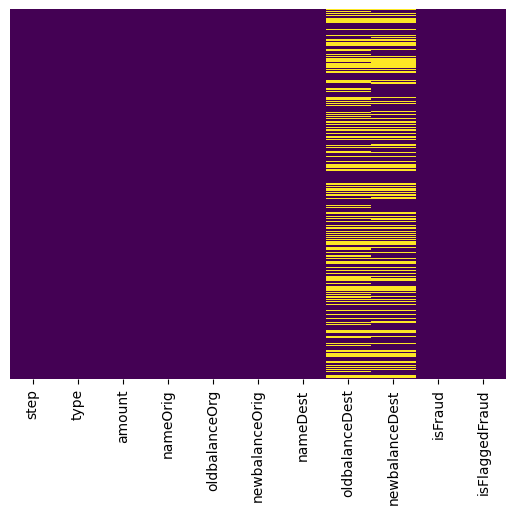

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Label Encoding
- Replace Categorical values with Numerical values

In [8]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data['type'] = le.fit_transform(data['type'])

#### Dtype of type feature changed

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


#### Dropping categorical features because too many unique values.

In [10]:

data = data.drop(['nameOrig','nameDest'],axis=1)

#### All values are in Numerical Format

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


In [ ]:
data.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,339682.13,0.0,NaN,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.0,NaN,NaN,1,0
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,NaN,NaN,1,0
6362619,743,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


#### Impute missing values with Mean values of the feature

In [12]:
# Fill Nan with Mean Values

data['oldbalanceDest'] = data['oldbalanceDest'].fillna(data['oldbalanceDest'].mean())

In [13]:
data['newbalanceDest'] = data['newbalanceDest'].fillna(data['newbalanceDest'].mean())

In [14]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Viualize missing values in a data

<Axes: >

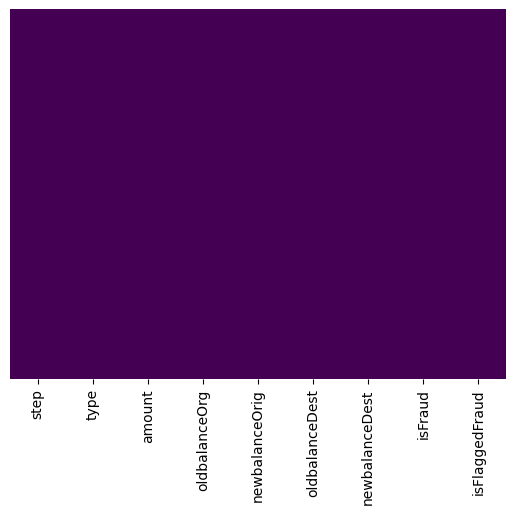

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Check for Duplicates

In [14]:
data.duplicated().sum()

543

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [ ]:
data.shape

(6362077, 9)

In [ ]:
data.value_counts()

step  type  amount      oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     0     270.78      4184966.65     4185237.43      3.019000e+03    1.986698e+06    0        0                 1
306   1     221317.77   0.00           0.00            8.728858e+05    1.094204e+06    0        0                 1
            221959.04   0.00           0.00            4.665849e+05    6.885439e+05    0        0                 1
            221957.23   0.00           0.00            1.076510e+06    1.298467e+06    0        0                 1
            221917.78   0.00           0.00            2.479607e+06    2.701525e+06    0        0                 1
                                                                                                                 ..
183   1     373389.48   264367.64      0.00            9.266932e+05    1.300083e+06    0        0                 1
            373282.66   103937.02      0.00            3.359092e+05    7.0919

### Data Visualization

<Axes: xlabel='type', ylabel='count'>

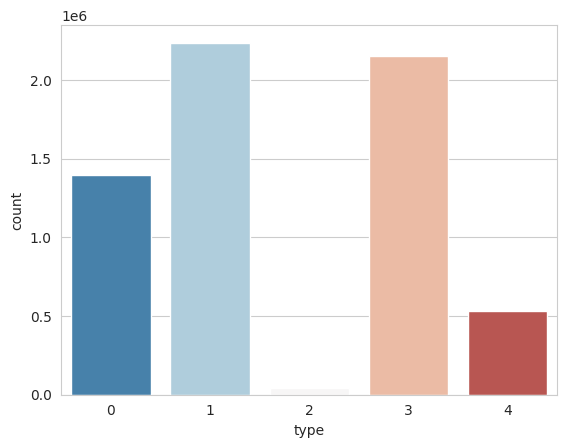

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='type',data=data,palette='RdBu_r')

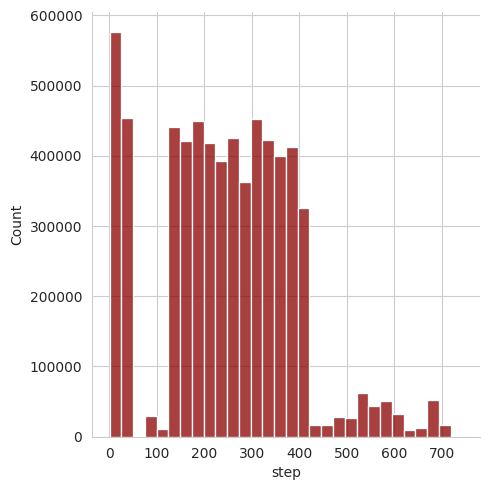

In [ ]:
sns.displot(data['step'].dropna(),kde=False,color='darkred',bins=30)

#### Correlated Features

<Axes: >

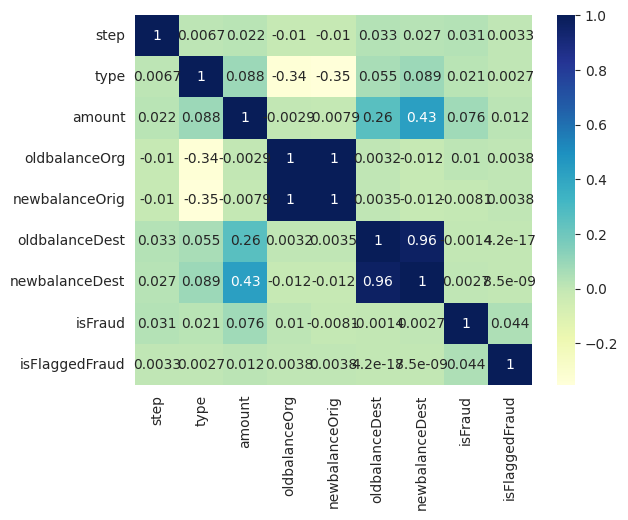

In [ ]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot =True) # Certain features are correlated

## Splitting the Features

In [17]:
x = data.drop(['isFraud','isFlaggedFraud'],axis=1)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,1.914407e+06,1.986698e+06
1,1,3,1864.28,21249.0,19384.72,1.914407e+06,1.986698e+06
2,1,4,181.00,181.0,0.00,1.914407e+06,1.986698e+06
3,1,1,181.00,181.0,0.00,2.118200e+04,1.986698e+06
4,1,3,11668.14,41554.0,29885.86,1.914407e+06,1.986698e+06


In [18]:
y = data['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362077, dtype: int64

##### Cross Validation

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4453453, 7), (1908624, 7), (4453453,), (1908624,))

A Look at the Data

In [39]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
4731647,332,0,344955.53,12262.00,357217.53,1.962102e+05,1.986698e+06
3681457,276,1,147633.91,10336.00,0.00,1.914407e+06,1.476339e+05
2793810,216,1,424584.44,14905.12,0.00,8.078878e+05,1.232472e+06
4686343,331,3,1716.63,0.00,0.00,1.914407e+06,1.986698e+06
5134669,356,3,2016.96,12074.00,10057.04,1.914407e+06,1.986698e+06


In [40]:
x_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2749324,212,0,45479.90,733.00,46212.90,1.914407e+06,1.986698e+06
245600,14,3,14930.98,273126.49,258195.51,1.914407e+06,1.986698e+06
5048455,354,3,5910.72,0.00,0.00,1.914407e+06,1.986698e+06
3181807,239,3,12490.19,10762.00,0.00,1.914407e+06,1.986698e+06
2180573,185,0,16184.57,6277220.34,6293404.91,2.752842e+06,2.736658e+06


In [41]:
y_train.head()

4731647    0
3681457    0
2793810    0
4686343    0
5134669    0
Name: isFraud, dtype: int64

In [42]:
y_test.head()

2749324    0
245600     0
5048455    0
3181807    0
2180573    0
Name: isFraud, dtype: int64

#### Scaling the Data

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale_x_train = scale.fit_transform(x_train)
scale_x_test = scale.transform(x_test)

In [32]:
scale_x_train

array([[-2.90915762e-01,  9.52267089e-01, -2.79586087e-01, ...,
        -2.92431874e-01,  1.11170597e-05,  2.40189674e-05],
       [-5.90726189e-02,  9.52267089e-01, -2.98916229e-01, ...,
        -2.74968072e-01,  1.11170597e-05,  2.40189674e-05],
       [ 4.25690316e-01,  9.52267089e-01, -2.97098551e-01, ...,
        -2.92431874e-01,  1.11170597e-05,  2.40189674e-05],
       ...,
       [ 7.48865607e-01, -1.26978584e+00,  6.55727340e-02, ...,
        -2.12720615e-01, -2.78942547e-01, -3.39504078e-01],
       [ 4.46766966e-01,  9.52267089e-01, -2.87117869e-01, ...,
        -2.92431874e-01,  1.11170597e-05,  2.40189674e-05],
       [-5.93014403e-01, -1.26978584e+00, -1.54462525e-01, ...,
        -2.58495463e-01,  1.11170597e-05,  2.40189674e-05]])

In [33]:
scale_x_test

array([[-2.20660264e-01, -1.26978584e+00, -2.24619655e-01, ...,
        -2.76625831e-01,  1.11170597e-05,  2.40189674e-05],
       [-1.61171912e+00,  9.52267089e-01, -2.75695461e-01, ...,
        -2.04122130e-01,  1.11170597e-05,  2.40189674e-05],
       [ 7.76967806e-01,  9.52267089e-01, -2.90776748e-01, ...,
        -2.92431874e-01,  1.11170597e-05,  2.40189674e-05],
       ...,
       [ 2.92204870e-01,  9.52267089e-01, -2.94725290e-01, ...,
        -2.89676870e-01,  1.11170597e-05,  2.40189674e-05],
       [ 1.05798980e+00, -1.26978584e+00,  3.69306091e-01, ...,
         6.06093102e-01, -4.23651942e-01, -5.24288058e-01],
       [ 9.54894764e-02,  9.52267089e-01, -2.79446597e-01, ...,
        -2.44781310e-01,  1.11170597e-05,  2.40189674e-05]])

In [46]:
scale_x_train.shape

(4453453, 7)

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Model Building
- Dense layers with relu activation layer
- Tanh AF on final layer

In [47]:
ann = Sequential()
ann.add(Dense(50,activation='relu',input_dim=7))
ann.add(Dense(30,activation='relu'))
ann.add(Dense(10,activation='relu'))
ann.add(Dense(1,activation='tanh'))


In [48]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,251
Trainable params: 2,251
Non-trainable params: 0
_________________________________________________________________


### Model Compiling

In [49]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

### Training the Model

In [50]:
hist = ann.fit(scale_x_train,y_train,epochs=5,validation_split=0.2,batch_size=64)

Epoch 1/5
55669/55669 [==============================] - 269s 5ms/step - loss: 6.6004e-04 - accuracy: 0.9993 - val_loss: 4.5128e-04 - val_accuracy: 0.9995
Epoch 2/5
55669/55669 [==============================] - 282s 5ms/step - loss: 5.0194e-04 - accuracy: 0.9995 - val_loss: 4.0699e-04 - val_accuracy: 0.9996
Epoch 3/5
55669/55669 [==============================] - 279s 5ms/step - loss: 4.7849e-04 - accuracy: 0.9995 - val_loss: 5.1353e-04 - val_accuracy: 0.9994
Epoch 4/5
55669/55669 [==============================] - 285s 5ms/step - loss: 4.6044e-04 - accuracy: 0.9995 - val_loss: 5.6247e-04 - val_accuracy: 0.9994
Epoch 5/5
55669/55669 [==============================] - 285s 5ms/step - loss: 4.5458e-04 - accuracy: 0.9995 - val_loss: 3.9073e-04 - val_accuracy: 0.9996


#### Model Prediction

In [51]:
y_pred = ann.predict(scale_x_test)

59645/59645 [==============================] - 135s 2ms/step


#### Model Evaluation

In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.6731928583426745


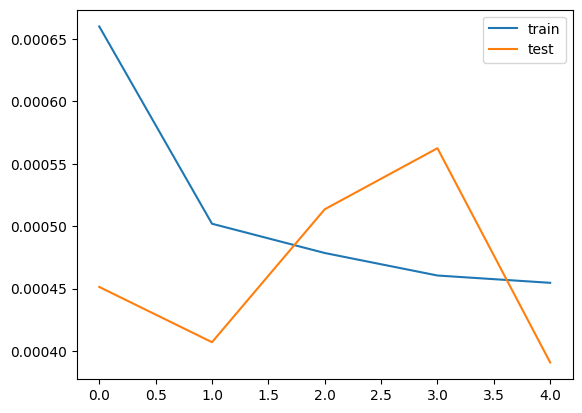

In [55]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

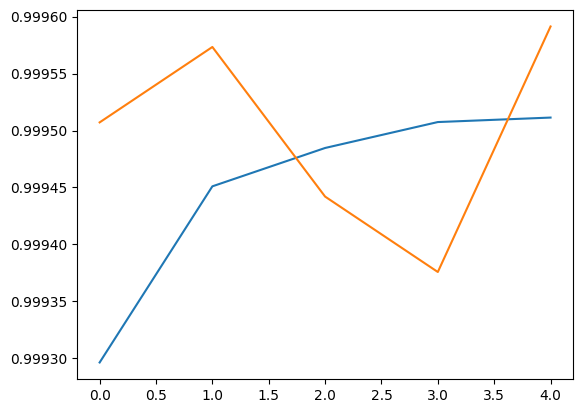

In [56]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [57]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.020418549021680124

## MAchine Learning Approach - Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

#### Model Training

In [60]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classifier.fit(scale_x_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = classifier.predict(scale_x_test)

#### Evaluation Metrics

In [63]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.7576888407224831


In [64]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.01758190040227644

In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9996908767782444

In [66]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

#### Confusion Matrix

<Axes: >

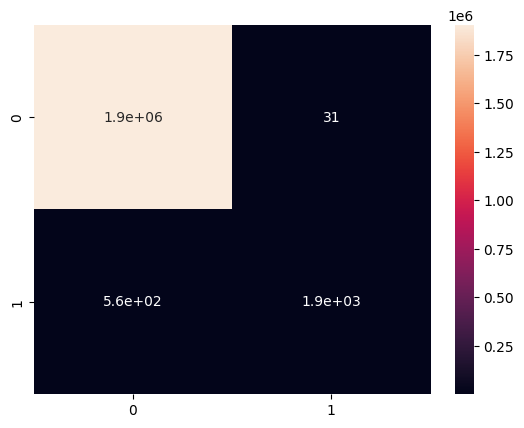

In [67]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)


From the Evaluation metrics, Random Forest Classifier performs better than MLP.
---
- Number of estimators(trees) are higher in Random Forest approach.
- Performing hyperparameter tuning will increase the model performances.
- Removing Correlated features will enhance the performnace.
- Outliers were removes, Missing Values were either removed or Imputed.
- EDA was performed on the Data.



## THANK YOU:))

---



---

